In [4]:
import numpy as np
import pandas as pd
import uproot as ur

%matplotlib inline 
import matplotlib.pyplot as plt
plt.style.use('classic')
plt.rc('figure', facecolor='w', figsize=(10,10))
plt.rc('axes', labelsize=24)
plt.rc('axes', titlesize=24)

### OLD IMPLEMENTATION

In [ ]:
df_16 = pd.read_csv('../data/from_ming-yan/old/limits/Legacy16_MVA1130_limit125.csv')
df_17 = pd.read_csv('../data/from_ming-yan/old/limits/Rereco17_MVA1130_limit125.csv')
df_18 = pd.read_csv('../data/from_ming-yan/old/limits/Rereco18_MVA1130_limit125.csv')

In [ ]:
cat_dict = {} 
scale_dict = {}
offset_dict = {}

cat_dict['eeg'] = {'dijet': 2, 'untagged': 3}
cat_dict['mmg'] = {'dijet': 4, 'untagged': 5} 
cat_dict['combined'] = {'combined':1, 'lepton': 6}

scale_dict['eeg'] = {'dijet': 1., 'untagged': 1.}
scale_dict['mmg'] = {'dijet': 1., 'untagged': 1.} 
scale_dict['combined'] = {'combined':1., 'lepton': 1./5.}

offset_dict[2016] = {'dijet': 0.2, 'untagged': 0.2, 'lepton': 0.2, 'combined': 0.2}
offset_dict[2017] = {'dijet': 0., 'untagged': 0., 'lepton': 0., 'combined': 0.}
offset_dict[2018] = {'dijet': -0.2, 'untagged': -0.2, 'lepton': -0.2, 'combined': -0.2}

In [ ]:
fig, ax = plt.subplots()

channels = ['eeg', 'mmg', 'combined']
for c in channels:
    
    year_offset = 0.1
    
    tmp_df_16 = df_16.query(f'year == "Legacy16_MVA1130" and channel == "{c}"')
    tmp_df_16['cat_val'] = df_16.category.map(cat_dict[c])
    tmp_df_16['cat_scale'] = df_16.category.map(scale_dict[c])
    tmp_df_16['cat_offset'] = df_16.category.map(offset_dict[2016])


    ax.errorbar(tmp_df_16.expected_limit*tmp_df_16.cat_scale, tmp_df_16.cat_val + tmp_df_16.cat_offset, 
                xerr=[abs(np.subtract(tmp_df_16.expected_minus_2_sig*tmp_df_16.cat_scale, tmp_df_16.expected_limit*tmp_df_16.cat_scale)),
                      abs(np.subtract(tmp_df_16.expected_plus_2_sig*tmp_df_16.cat_scale, tmp_df_16.expected_limit*tmp_df_16.cat_scale))],
                linestyle='None', linewidth=10, marker='None', markersize=5, markerfacecolor='w', markeredgecolor='k',
                color='y', capsize=0, label='95% expected', zorder=1);

    ax.errorbar(tmp_df_16.expected_limit*tmp_df_16.cat_scale, tmp_df_16.cat_val + tmp_df_16.cat_offset, 
                xerr=[abs(np.subtract(tmp_df_16.expected_minus_1_sig*tmp_df_16.cat_scale, tmp_df_16.expected_limit*tmp_df_16.cat_scale)),
                      abs(np.subtract(tmp_df_16.expected_plus_1_sigma*tmp_df_16.cat_scale, tmp_df_16.expected_limit*tmp_df_16.cat_scale))],
                linestyle='None', linewidth=10, marker='None', markersize=5, markerfacecolor='w', markeredgecolor='k',
                color='g', capsize=0, label='68% expected', zorder=2);
    ax.scatter(tmp_df_16.expected_limit*tmp_df_16.cat_scale, tmp_df_16.cat_val + tmp_df_16.cat_offset, 
               marker='o', c='w', s=150, 
               label='2016 expected (background only)', zorder=3)
    
    tmp_df_17 = df_17.query(f'year == "Rereco17_MVA1130" and channel == "{c}"')
    tmp_df_17['cat_val'] = df_17.category.map(cat_dict[c])
    tmp_df_17['cat_scale'] = df_17.category.map(scale_dict[c])
    tmp_df_17['cat_offset'] = df_17.category.map(offset_dict[2017])

    ax.errorbar(tmp_df_17.expected_limit*tmp_df_17.cat_scale, tmp_df_17.cat_val + tmp_df_17.cat_offset, 
                xerr=[abs(np.subtract(tmp_df_17.expected_minus_2_sig*tmp_df_17.cat_scale, tmp_df_17.expected_limit*tmp_df_17.cat_scale)),
                      abs(np.subtract(tmp_df_17.expected_plus_2_sig*tmp_df_17.cat_scale, tmp_df_17.expected_limit*tmp_df_17.cat_scale))],
                linestyle='None', linewidth=10, marker='None', markersize=5, markerfacecolor='w', markeredgecolor='k',
                color='y', capsize=0, zorder=1);

    ax.errorbar(tmp_df_17.expected_limit*tmp_df_17.cat_scale, tmp_df_17.cat_val + tmp_df_17.cat_offset, 
                xerr=[abs(np.subtract(tmp_df_17.expected_minus_1_sig*tmp_df_17.cat_scale, tmp_df_17.expected_limit*tmp_df_17.cat_scale)),
                      abs(np.subtract(tmp_df_17.expected_plus_1_sigma*tmp_df_17.cat_scale, tmp_df_17.expected_limit*tmp_df_17.cat_scale))],
                linestyle='None', linewidth=10, marker='None', markersize=5, markerfacecolor='w', markeredgecolor='k',
                color='g', capsize=0, zorder=2);
    ax.scatter(tmp_df_17.expected_limit*tmp_df_17.cat_scale, tmp_df_17.cat_val + tmp_df_17.cat_offset, marker='^', c='w', s=150, 
               label='2017 expected (background only)', zorder=3)
    
    tmp_df_18 = df_18.query(f'year == "Rereco18_MVA1130" and channel == "{c}"')
    tmp_df_18['cat_val'] = df_18.category.map(cat_dict[c])
    tmp_df_18['cat_scale'] = df_18.category.map(scale_dict[c])
    tmp_df_18['cat_offset'] = df_18.category.map(offset_dict[2018])

    ax.errorbar(tmp_df_18.expected_limit*tmp_df_18.cat_scale, tmp_df_18.cat_val + tmp_df_18.cat_offset, 
                xerr=[abs(np.subtract(tmp_df_18.expected_minus_2_sig*tmp_df_18.cat_scale, tmp_df_18.expected_limit*tmp_df_18.cat_scale)),
                      abs(np.subtract(tmp_df_18.expected_plus_2_sig*tmp_df_18.cat_scale, tmp_df_18.expected_limit*tmp_df_18.cat_scale))],
                linestyle='None', linewidth=10, marker='None', markersize=5, markerfacecolor='w', markeredgecolor='k',
                color='y', capsize=0, zorder=1);

    ax.errorbar(tmp_df_18.expected_limit*tmp_df_18.cat_scale, tmp_df_18.cat_val + tmp_df_18.cat_offset, 
                xerr=[abs(np.subtract(tmp_df_18.expected_minus_1_sig*tmp_df_18.cat_scale, tmp_df_18.expected_limit*tmp_df_18.cat_scale)),
                      abs(np.subtract(tmp_df_18.expected_plus_1_sigma*tmp_df_18.cat_scale, tmp_df_18.expected_limit*tmp_df_18.cat_scale))],
                linestyle='None', linewidth=10, marker='None', markersize=5, markerfacecolor='w', markeredgecolor='k',
                color='g', capsize=0, zorder=2);
    ax.scatter(tmp_df_18.expected_limit*tmp_df_18.cat_scale, tmp_df_18.cat_val + tmp_df_18.cat_offset, marker='s', c='w', s=150, 
               label='2018 expected (background only)', zorder=3)
    
    if c == 'eeg':
        ax.axvline(1, color='r', linewidth=3, label='$\sf \sigma/\sigma_{SM} = 1$')
        
        #comb_central = 2.2578
        #comb_minus2 = 1.2436
        #comb_plus2 = 4.4168
        #comb_minus1 = 1.6318
        #comb_plus1 = 3.2208
        
        #year_offset = 0.2

        #ax.errorbar(comb_central, 1 - year_offset,
        #            xerr=[[comb_central - comb_minus2], [comb_plus2 - comb_central]],
        #            linestyle='None', linewidth=10, marker='None', markersize=5, markerfacecolor='w', markeredgecolor='k',
        #            color='y', capsize=0, zorder=1);

        #ax.errorbar(comb_central, 1 - year_offset,
        #            xerr=[[comb_central - comb_minus1], [comb_plus1 - comb_central]],
        #            linestyle='None', linewidth=10, marker='None', markersize=5, markerfacecolor='w', markeredgecolor='k',
        #            color='g', capsize=0, zorder=1);

        #ax.scatter(comb_central, 1 - year_offset, marker='s', c='w', s=150, 
        #           label='combined expected (background only)', zorder=3)
        
        ax.legend(loc='lower right', prop={'size': 14});


#ax.set_ylim(ymax=15)
ax.set_xlim(0, 80)
#ax.set_xscale('log')
#ax.legend();
ax.grid(linestyle=':')
ax.set_xlabel('95% CL upper limit on $\sf \sigma/\sigma_{SM}$')

hzg_llg = r'$\sf H\rightarrow Z\gamma \rightarrow \ell\ell\gamma$'
hzg_mmg = r'$\sf H\rightarrow Z\gamma \rightarrow \mu\mu\gamma$'
hzg_eeg = r'$\sf H\rightarrow Z\gamma \rightarrow ee\gamma$'

ax.set_yticks(np.linspace(0, 6, num=7))

ax.set_yticklabels(['', 
                    hzg_llg, 
                    hzg_eeg+' dijet ', 
                    hzg_eeg+' untagged', 
                    hzg_mmg+' dijet', 
                    hzg_mmg+' untagged', 
                    hzg_llg+' lepton / 5'
                   ])

#ax.set_title('CMS (13 TeV)')
ax.set_xlim(0., 20.)
ax.tick_params(labelsize=14)
ax.set_title('CMS (13 TeV)                                 137 $\sf fb^{-1}$', loc='left')

ax.set_xticks(np.arange(0., 20., 2))
ax.set_xticks(np.arange(0., 20., 0.5), minor=True)
ax.tick_params(axis='x', length=10, width=1, direction='in')
ax.tick_params(axis='x', length=3, width=1, direction='in', which='minor')
ax.tick_params(axis='y', labelsize=18)

#for i, label in enumerate(ax.xaxis.get_ticklabels()):
#    if i % 4 != 0: 
#        label.set_visible(False)

#ax.xaxis.set_major_formatter(plt.NullFormatter())

plt.tight_layout();
plt.savefig('../plots/per-category_limits_all.png')

### NEW IMPLEMENTATION

In [ ]:
#df = pd.read_csv('../data/james_limits/all_limits_06-25-20.csv')
#df = pd.read_csv('../data/james_limits/all_limits_09-11-20.csv')
#df = pd.read_csv('../data/james_limits/all_limits_01-06-20.csv')
#df.head()

In [5]:
df_dict = {}

runs = ['1', '2', '3', '4', '501', '502', '503', '6789', 'untag', 'VBF', 'all']

In [6]:
for run in runs:
    df_dict[run] = ur.open(f'../data/james_limits/turnon_v2/limits_vs_mass/higgsCombine{run}.AsymptoticLimits.mH125.38.root')['limit'].pandas.df()

In [7]:
print(df_dict['all'].query('quantileExpected == 0.5')['limit'])
print(df_dict['all'].query('quantileExpected < 0')['limit'])

entry
2    1.84375
Name: limit, dtype: float64
entry
5    4.202472
Name: limit, dtype: float64


In [8]:
labels = ['channel','category','expected','expected_plus_1_sig','expected_minus_1_sig','expected_plus_2_sig','expected_minus_2_sig','observed']
flatlist = []
for run in runs:
    expected = df_dict[run].query('quantileExpected == 0.5')['limit'].values[0]
    expected_plus_1_sig = df_dict[run].query('quantileExpected == 0.84')['limit'].values[0]
    expected_minus_1_sig = df_dict[run].query('quantileExpected == 0.16')['limit'].values[0]
    expected_plus_2_sig = df_dict[run].query('quantileExpected == 0.975')['limit'].values[0]
    expected_minus_2_sig = df_dict[run].query('quantileExpected == 0.025')['limit'].values[0]
    observed = df_dict[run].query('quantileExpected < 0')['limit'].values[0]
    
    flatlist.append(['ele_mu',run,expected,expected_plus_1_sig,expected_minus_1_sig,
                     expected_plus_2_sig,expected_minus_2_sig,observed])
    
    print(run)
    print(expected)
    print(expected_plus_1_sig)
    print(expected_plus_2_sig)
    print(expected_minus_1_sig)
    print(expected_minus_2_sig)
    print(observed)
    
df = pd.DataFrame(flatlist, columns=labels)

1
4.015625
5.69630241394043
7.80846643447876
2.800447463989258
1.9136962890625
3.970231514811965
2
4.78125
7.0110673904418945
9.569416046142578
3.5669689178466797
2.652099609375
5.55014218314097
3
4.421875
6.061072826385498
8.167009353637695
3.2956247329711914
2.57366943359375
8.016875779701767
4
6.0
9.013448715209961
13.521102905273438
4.26416015625
3.1875
8.667598430329148
501
3.75
5.603509902954102
8.208840370178223
2.5820159912109375
1.904296875
3.300389657101086
502
8.9375
12.535651206970215
17.16846466064453
6.237266540527344
4.3291015625
9.33083735982782
503
8.5
11.684847831726074
15.502059936523438
6.0478973388671875
3.951171875
18.551974037706827
6789
18.25
26.324726104736328
36.466156005859375
12.97015380859375
9.6953125
29.06825365217898
untag
2.3984375
3.364025354385376
4.791456699371338
1.684791088104248
1.18048095703125
4.304104602712215
VBF
3.046875
4.455691814422607
6.52223539352417
2.124481201171875
1.571044921875
5.438681367059029
all
1.84375
2.6301214694976807
3.5951

In [9]:
cat_dict = {} 

cat_dict['all'] = 1
cat_dict['VBF'] = 3
cat_dict['503'] = 4
cat_dict['502'] = 5
cat_dict['501'] = 6
cat_dict['untag'] = 8
cat_dict['4'] = 9
cat_dict['3'] = 10
cat_dict['2'] = 11
cat_dict['1'] = 12
cat_dict['6789'] = 14

df['cat_val'] = df.category.map(cat_dict)

In [10]:
df.cat_val

0     12
1     11
2     10
3      9
4      6
5      5
6      4
7     14
8      8
9      3
10     1
Name: cat_val, dtype: int64

In [11]:
scale_dict = {} 

scale_dict['all'] = 1
scale_dict['VBF'] = 1
scale_dict['503'] = 1
scale_dict['502'] = 1
scale_dict['501'] = 1
scale_dict['untag'] = 1
scale_dict['4'] = 1
scale_dict['3'] = 1
scale_dict['2'] = 1
scale_dict['1'] = 1
scale_dict['6789'] = 1./5.

df['cat_scale'] = df.category.map(scale_dict)

In [12]:
offset_dict = {} 

offset_dict['all'] = 0
offset_dict['VBF'] = 0
offset_dict['503'] = 0
offset_dict['502'] = 0
offset_dict['501'] = 0
offset_dict['untag'] = 0
offset_dict['4'] = 0
offset_dict['3'] = 0
offset_dict['2'] = 0
offset_dict['1'] = 0
offset_dict['6789'] = 0

df['cat_offset'] = df.category.map(offset_dict)

In [13]:
label_dict = {} 

label_dict['all'] = 'full combination'
label_dict['VBF'] = 'combined dijet'
label_dict['503'] = 'dijet 3'
label_dict['502'] = 'dijet 2'
label_dict['501'] = 'dijet 1'
label_dict['untag'] = 'combined untagged'
label_dict['4'] = 'untagged 4'
label_dict['3'] = 'untagged 3'
label_dict['2'] = 'untagged 2'
label_dict['1'] = 'untagged 1'
label_dict['6789'] = 'lepton tag'

df['cat_label'] = df.category.map(label_dict)

label_list = ['', 'full combination', '', 'combined dijet', 'dijet 3', 'dijet 2', 'dijet 1', '', 
              'combined untagged', 'untagged 4', 'untagged 3', 'untagged 2', 'untagged 1', '', 'lepton tag / 5', '']

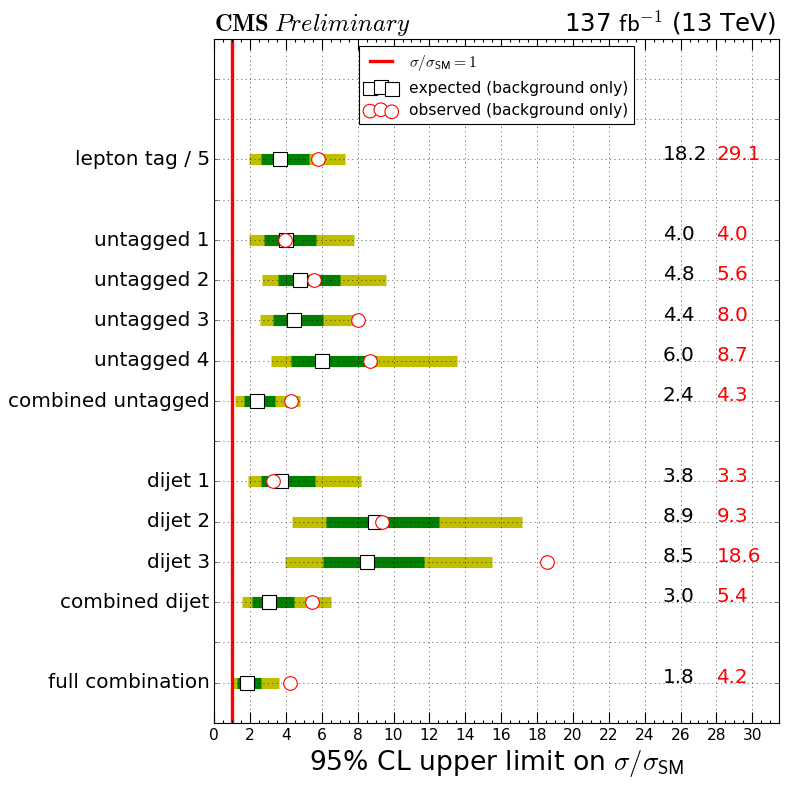

In [54]:
fig, ax = plt.subplots()

ax.errorbar(df.expected*df.cat_scale, df.cat_val + df.cat_offset, 
            xerr=[abs(np.subtract(df.expected_minus_2_sig*df.cat_scale, df.expected*df.cat_scale)),
                  abs(np.subtract(df.expected_plus_2_sig*df.cat_scale, df.expected*df.cat_scale))],
            linestyle='None', linewidth=10, marker='None', markersize=5, markerfacecolor='w', markeredgecolor='k',
            color='y', capsize=0, zorder=1);

ax.errorbar(df.expected*df.cat_scale, df.cat_val + df.cat_offset, 
            xerr=[abs(np.subtract(df.expected_minus_1_sig*df.cat_scale, df.expected*df.cat_scale)),
                  abs(np.subtract(df.expected_plus_1_sig*df.cat_scale, df.expected*df.cat_scale))],
            linestyle='None', linewidth=10, marker='None', markersize=5, markerfacecolor='w', markeredgecolor='k',
            color='g', capsize=0, zorder=2);
ax.scatter(df.expected*df.cat_scale, df.cat_val + df.cat_offset, marker='s', c='w', s=150, 
           label='expected (background only)', zorder=3)
ax.scatter(df.observed*df.cat_scale, df.cat_val + df.cat_offset, marker='o', c='w', s=150, 
           label='observed (background only)', zorder=3, edgecolors='r')

ax.axvline(1, color='r', linewidth=3, label='$\sf \sigma/\sigma_{SM} = 1$')

ax.legend(loc='upper center', prop={'size': 14});

ax.set_xlim(0, 80)
ax.grid(linestyle=':')
ax.set_xlabel('95% CL upper limit on $\sf \sigma/\sigma_{SM}$')

hzg_llg = r'$\sf H\rightarrow Z\gamma \rightarrow \ell\ell\gamma$'
hzg_mmg = r'$\sf H\rightarrow Z\gamma \rightarrow \mu\mu\gamma$'
hzg_eeg = r'$\sf H\rightarrow Z\gamma \rightarrow ee\gamma$'

#ax.set_yticks(np.linspace(0, 15, num=16))
ax.set_yticks(np.linspace(0, 17, num=18))

ax.set_yticklabels(label_list)


#ax.set_yticklabels(['', 
#                    hzg_llg, 
#                    hzg_eeg+' dijet ', 
#                    hzg_eeg+' untagged', 
#                    hzg_mmg+' dijet', 
#                    hzg_mmg+' untagged', 
#                    hzg_llg+' lepton / 5'
#                   ])

#ax.set_title('CMS (13 TeV)')
ax.set_xlim(0., 20.)
ax.tick_params(labelsize=14)
ax.set_title(r'$\sf \bf{CMS} \; \it{Preliminary}$                    137 $\sf fb^{-1}$ (13 TeV)', loc='left', fontsize=22)

#ax.set_xticks(np.arange(0., 24., 2))
ax.set_xticks(np.arange(0., 32., 2))
#ax.set_xticks(np.arange(0., 24., 0.5), minor=True)
ax.set_xticks(np.arange(0., 32., 0.5), minor=True)
ax.tick_params(axis='x', length=10, width=1, direction='in')
ax.tick_params(axis='x', length=3, width=1, direction='in', which='minor')
ax.tick_params(axis='y', labelsize=18)

#for i, label in enumerate(ax.xaxis.get_ticklabels()):
#    if i % 4 != 0: 
#        label.set_visible(False)

#ax.xaxis.set_major_formatter(plt.NullFormatter())

for cat in runs:
    entry = df.query(f'cat_val == {cat_dict[cat]}')
    y_val = entry.cat_val + entry.cat_offset
    exp_val = entry.expected.values[0]
    obs_val = entry.observed.values[0]
    ax.text(25, y_val, f'{exp_val:.1f}', fontsize=18)
    ax.text(28, y_val, f'{obs_val:.1f}', c='r', fontsize=18)

plt.tight_layout();
plt.savefig('../plots/per-category_limits_all_james_06-29-21_unblind.png')

In [ ]:
df[['category','observed']]

In [27]:
df.category.value_counts()

2        1
all      1
6789     1
501      1
VBF      1
3        1
502      1
4        1
1        1
503      1
untag    1
Name: category, dtype: int64

In [33]:
df.query('cat_val == 12')

,channel,category,expected,expected_plus_1_sig,expected_minus_1_sig,expected_plus_2_sig,expected_minus_2_sig,observed,cat_val,cat_scale,cat_offset,cat_label
0,ele_mu,1,4.015625,5.696302,2.800447,7.808466,1.913696,3.970232,12,1.0,0,untagged 1
